## Drill Hole Data Processing

Drilling hole is a traditional method to explore minerals or other resources (for example, fresh water.) By drilling holes, observing the rock samples from the drill holes and taking other physical or chemical methods to measure these samples could get a comprehensive understanding of the area where the drillhole locates from the perspective of geology, geochemistry, petrology, biostratigraphy, et. The features from all these aspects construct a good dataset for predict the existence of cores. 

As drilling-hole provides rock sample for other ways, we start our data preparation from it. 


In [10]:
# import required packages
import pandas as pd
import os
import pickle
import sys
import matplotlib.pyplot as plt

pd.options.display.width=None
pd.options.display.max_columns=None


if sys.version_info >= (3, 6):
    from zipfile import ZipFile as zipfile
else:
    import zipfile36 as zipfile
    
url = "https://unearthed-exploresa.s3-ap-southeast-2.amazonaws.com/Unearthed_5_SARIG_Data_Package.zip" 
# enter the directory to save data
data_loc = './data'
file_name = 'Unearthed_5_SARIG_Data_Package.zip'

if os.path.isfile(os.path.join(data_loc, file_name)):
    print ("File exist")
    pass
else:
    # open and save the zip file onto computer
    url = urlopen(URL)
    output = open('./data/Unearthed_5_SARIG_Data_Package.zip', 'wb')    # note the flag:  "wb"        
    output.write(url.read())
    output.close()
    

# list all the files in the dataset and group these data tables.     
files_in_dataset = []
file_name = 'Unearthed_5_SARIG_Data_Package.zip'
for file in zipfile(os.path.join(data_loc, file_name),'r').filelist:
    files_in_dataset.append(file.filename)
    
files_in_dataset



File exist


['SARIG_Data_Package/sarig_dh_core_exp.csv',
 'SARIG_Data_Package/sarig_dh_details_exp.csv',
 'SARIG_Data_Package/sarig_dh_litho_exp.csv',
 'SARIG_Data_Package/sarig_dh_petrophys_exp.csv',
 'SARIG_Data_Package/sarig_dh_reference_exp.csv',
 'SARIG_Data_Package/sarig_dh_strat_exp.csv',
 'SARIG_Data_Package/sarig_fieldobs_exp.csv',
 'SARIG_Data_Package/sarig_fieldobs_litho_exp.csv',
 'SARIG_Data_Package/sarig_fieldobs_note_exp.csv',
 'SARIG_Data_Package/sarig_fieldobs_struct_exp.csv',
 'SARIG_Data_Package/sarig_md_commodity_exp.csv',
 'SARIG_Data_Package/sarig_md_details_exp.csv',
 'SARIG_Data_Package/sarig_md_mineralogy_exp.csv',
 'SARIG_Data_Package/sarig_md_reference_exp.csv',
 'SARIG_Data_Package/sarig_md_zone_hr_lith_exp.csv',
 'SARIG_Data_Package/sarig_md_zone_lith_exp.csv',
 'SARIG_Data_Package/sarig_rs_biostr_analys_exp.csv',
 'SARIG_Data_Package/sarig_rs_biostr_results_exp.csv',
 'SARIG_Data_Package/sarig_rs_chem_exp.csv',
 'SARIG_Data_Package/sarig_rs_chem_isotope_exp.csv',
 'SA

For this part of data cleaning, we will only use the following relevant files: 
 - 'SARIG_Data_Package/sarig_dh_core_exp.csv',
 - 'SARIG_Data_Package/sarig_dh_details_exp.csv',
 - 'SARIG_Data_Package/sarig_dh_litho_exp.csv',
 - 'SARIG_Data_Package/sarig_dh_petrophys_exp.csv',
 - 'SARIG_Data_Package/sarig_dh_reference_exp.csv',
 - 'SARIG_Data_Package/sarig_dh_strat_exp.csv'

### DRILL HOLE BASIC INFORMATION

In [11]:
sarig_dh_reference_exp = pd.read_csv(
    zipfile(os.path.join(data_loc, file_name),'r').open('SARIG_Data_Package/sarig_dh_reference_exp.csv','r'), 
    sep=',', encoding='latin1')
sarig_dh_reference_exp['SAMREF_CNO'] = sarig_dh_reference_exp['SAMREF_CNO'].astype('Int64')
sarig_dh_reference_exp['PUBLICATION_DATE'] = pd.to_datetime(sarig_dh_reference_exp['PUBLICATION_DATE'])
sarig_dh_reference_exp.head(5)

,DRILLHOLE_NO,INFO_TYPE_DESC,DOC_TYPE_DESC,REFERENCE,AUTHOR,PUBLICATION_DATE,TITLE,PUBLICATION,SAMREF_CNO,SAMREF_RECORD_URL
0,4,Hydrogeology Ref.,Report Book,RB 91/00039,"Read, R.E.",1991-03-01,"Pitjantjatjara-Ngaanyatjara Lands, 1990 drilling.",South Australia. Department of Mines and Energ...,5324,https://sarigbasis.pir.sa.gov.au/WebtopEw/ws/s...
1,7,Hydrogeology Ref.,Report Book,RB 91/00039,"Read, R.E.",1991-03-01,"Pitjantjatjara-Ngaanyatjara Lands, 1990 drilling.",South Australia. Department of Mines and Energ...,5324,https://sarigbasis.pir.sa.gov.au/WebtopEw/ws/s...
2,8,Hydrogeology Ref.,Report Book,RB 91/00039,"Read, R.E.",1991-03-01,"Pitjantjatjara-Ngaanyatjara Lands, 1990 drilling.",South Australia. Department of Mines and Energ...,5324,https://sarigbasis.pir.sa.gov.au/WebtopEw/ws/s...
3,20,Hydrogeology Ref.,Report Book,RB 78/00037,"Stadter, M.H.;Sibenaler, X.P.;Barnett, S.R.",1978-01-01,North-West Aboriginal Reserve's drilling progr...,South Australia. Department of Mines and Energ...,2354,https://sarigbasis.pir.sa.gov.au/WebtopEw/ws/s...
4,20,Master Ref.,Report Book,RB 78/00037,"Stadter, M.H.;Sibenaler, X.P.;Barnett, S.R.",1978-01-01,North-West Aboriginal Reserve's drilling progr...,South Australia. Department of Mines and Energ...,2354,https://sarigbasis.pir.sa.gov.au/WebtopEw/ws/s...


In [12]:
sarig_dh_reference_exp[['DRILLHOLE_NO', 'PUBLICATION_DATE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254296 entries, 0 to 254295
Data columns (total 2 columns):
DRILLHOLE_NO        254296 non-null int64
PUBLICATION_DATE    87444 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 MB


### DRILL HOLE DETAILED INFORMATION
This summarize what information will be included into the other data tables.

In [13]:
sarig_dh_details_exp = pd.read_csv(
    zipfile(os.path.join(data_loc, file_name),'r').open('SARIG_Data_Package/sarig_dh_details_exp.csv','r'), 
    sep=',', encoding='latin1')
# sarig_dh_details_exp['SAMREF_CNO'] = sarig_dh_reference_exp['SAMREF_CNO'].astype('Int64')
sarig_dh_details_exp['MAX_DRILLED_DEPTH_DATE'] = pd.to_datetime(sarig_dh_details_exp['MAX_DRILLED_DEPTH_DATE'])
sarig_dh_details_exp.head(5)

C:\Program Files\Python36\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DRILLHOLE_NO,DH_NAME,DH_OTHER_NAME,PACE_DH,PACE_ROUND_NO,REPRESENTATIVE_DH,REPRESENTATIVE_DH_COMMENTS,DH_UNIT_NO,MAX_DRILLED_DEPTH,MAX_DRILLED_DEPTH_DATE,CORED_LENGTH,TENEMENT,OPERATOR_CODE,OPERATOR_NAME,TARGET_COMMODITIES,MINERAL_CLASS,PETROLEUM_CLASS,STRATIGRAPHIC_CLASS,ENGINEERING_CLASS,SEISMIC_POINT_CLASS,WATER_WELL_CLASS,WATER_POINT_CLASS,DRILLING_METHODS,STRAT_LOG,LITHO_LOG,PETROPHYSICAL_LOG,GEOCHEMISTRY,PETROLOGY,BIOSTRATIGRAPHY,SPECTRAL_SCANNED,CORE_LIBRARY,REFERENCES,HISTORICAL_DOCUMENTS,COMMENTS,MAP_250000,MAP_100000,MAP_50K_NO,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94,HORIZ_ACCRCY_M,ELEVATION_M,INCLINATION,AZIMUTH,SURVEY_METHOD_CODE,SURVEY_METHOD
0,1,GINGERAH HILL 1,NaN,N,NaN,N,NaN,3359 1,1473.50,1986-09-14,NaN,,NaN,NaN,NaN,N,Y,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,N,NaN,SE5114 MUNRO,3359 Cudalgarra,2,124,433537.93,7847062.23,51,122.366742,-19.469838,122.366734,-19.469824,NaN,NaN,NaN,NaN,NaN,NaN
1,2,BROOKE 1,NaN,N,NaN,N,NaN,3458 1,2035.10,1988-07-21,NaN,,NaN,NaN,NaN,N,Y,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,N,NaN,SE5114 MUNRO,3458 Brooke,1,125,491238.13,7816262.34,51,122.916370,-19.749266,122.916362,-19.749252,NaN,NaN,NaN,NaN,NaN,NaN
2,3,SAHARA 1,NaN,N,NaN,N,NaN,3555 1,2120.19,1965-02-26,NaN,,NaN,NaN,NaN,N,Y,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,Y,NaN,SF5107 SAHARA,3555 Tandalgoo,1,126,540836.18,7674882.10,51,123.392991,-21.026384,123.392983,-21.026370,200.0,NaN,NaN,NaN,MAP,Map Plot
3,4,NYALAYI 1/90,NaN,N,NaN,N,NaN,3743 1,96.00,1990-06-12,NaN,,NaN,NaN,Water,N,N,N,N,N,Y,N,Rotary,N,Y,N,N,N,N,N,N,Y,Y,NaN,SG5115 THROSSELL,3743 Buldya,1,127,647138.76,6991660.71,51,124.485432,-27.189890,124.485424,-27.189876,NaN,NaN,NaN,NaN,NaN,NaN
4,5,GAMBANGA 1,NaN,N,NaN,N,NaN,3833 1,391.06,1960-05-03,NaN,,NaN,NaN,NaN,N,Y,N,N,N,N,N,NaN,N,N,N,N,N,N,N,N,N,Y,NaN,SI5104 CULVER,3833 Price,3,128,664137.34,6426048.14,51,124.743123,-32.290334,124.743116,-32.290320,NaN,NaN,NaN,NaN,NaN,NaN


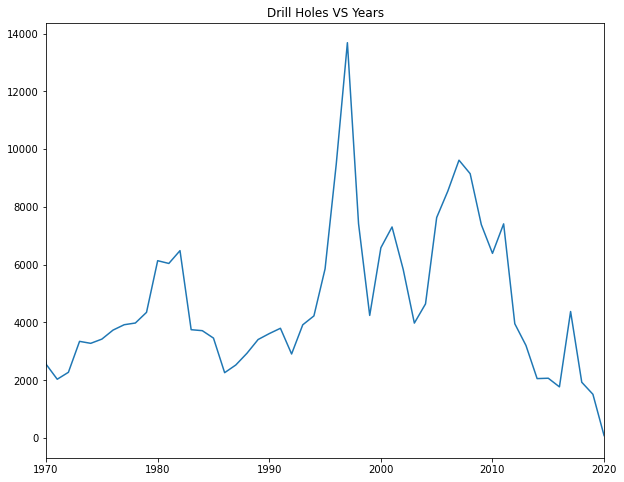

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(sarig_dh_details_exp[
    sarig_dh_details_exp['MAX_DRILLED_DEPTH_DATE'].notnull()][
    ['DRILLHOLE_NO', 'MAX_DRILLED_DEPTH_DATE']].drop_duplicates() [
    'MAX_DRILLED_DEPTH_DATE'].apply(lambda x: x.year).value_counts().sort_index())
plt.xlim(1970, 2020)
plt.title("Drill Holes VS Years")
plt.show()

This figure shows the number of drill holes for each year it reached its maximum drill depth. In the late 1990s and the decade after 2000, there were more drilling holes. 

### DRILL HOLE CORE INFORMATION

This datatable provides metadata what data/sample were collected at drill holes. 

In [15]:
sarig_dh_core_exp = pd.read_csv(
    zipfile(os.path.join(data_loc, file_name),'r').open('SARIG_Data_Package/sarig_dh_core_exp.csv','r'), 
    sep=',', encoding='latin1')
# sarig_dh_details_exp['SAMREF_CNO'] = sarig_dh_reference_exp['SAMREF_CNO'].astype('Int64')
#sarig_dh_core_exp['MAX_DRILLED_DEPTH_DATE'] = pd.to_datetime(sarig_dh_core_exp['MAX_DRILLED_DEPTH_DATE'])
sarig_dh_core_exp.sample(5)

,DRILLHOLE_NO,DRILLHOLE_NAME,TRAY_NO,DUPLICATE_INTERVAL_SET,DEPTH_FROM_M,DEPTH_TO_M,DEPTH_FROM_FEET,DEPTH_TO_FEET,CORE_TYPE,LIBRARY_LOCATION,ROCK_SAMPLE,ROCK_SAMPLE_LIBRARY,GEOCHEMISTRY,PETROLOGY,BIOSTRATIGRAPHY,STRAT_LOG_MAP_SYMBOLS,STRAT_LOG_STRAT_NAMES,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94
144517,211843,PARALANA 1B,334,NaN,1801.03,1805.86,5908.89,5924.74,Core,Tonsley,Y,Y,N,N,N,NaN,NaN,1085174,376161.37,6657276.99,54,139.713342,-30.209710,139.713332,-30.209696
46182,71073,PM 7,6,NaN,25.00,30.00,82.02,98.43,Core,Tonsley,N,N,N,N,N,Ek,Kanmantoo Group,62764,334628.48,6123644.73,54,139.187486,-35.016331,139.187476,-35.016316
33640,26548,TCWQ 131,8,NaN,259.00,263.00,849.74,862.86,Core,Tonsley,Y,N,N,N,N,NaN,NaN,21278,270435.27,6089952.79,54,138.475064,-35.307303,138.475054,-35.307288
222937,314588,RD517,36,NaN,639.00,645.00,2096.46,2116.14,Core,Virtual Core Library,Y,N,Y,N,N,NaN,NaN,2097733,677518.44,6633737.01,53,136.848155,-30.415370,136.848146,-30.415356
192121,275603,LE CHIFFRE 1,120,NaN,1905.20,1908.06,6250.66,6260.04,Core,Tonsley,Y,N,N,N,N,Pgp,Patchawarra Formation,1865212,407750.66,6786091.82,54,140.052446,-29.050113,140.052436,-29.050099


In [16]:
sarig_dh_core_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225333 entries, 0 to 225332
Data columns (total 25 columns):
DRILLHOLE_NO              225333 non-null int64
DRILLHOLE_NAME            220603 non-null object
TRAY_NO                   225333 non-null int64
DUPLICATE_INTERVAL_SET    4844 non-null object
DEPTH_FROM_M              225333 non-null float64
DEPTH_TO_M                225333 non-null float64
DEPTH_FROM_FEET           225333 non-null float64
DEPTH_TO_FEET             225333 non-null float64
CORE_TYPE                 225333 non-null object
LIBRARY_LOCATION          225333 non-null object
ROCK_SAMPLE               225333 non-null object
ROCK_SAMPLE_LIBRARY       225333 non-null object
GEOCHEMISTRY              225333 non-null object
PETROLOGY                 225333 non-null object
BIOSTRATIGRAPHY           225333 non-null object
STRAT_LOG_MAP_SYMBOLS     122035 non-null object
STRAT_LOG_STRAT_NAMES     122035 non-null object
SITE_NO                   225333 non-null int64
EASTING_

The columns "\*\_FEET" contain the same information as those "\*\_M", so they will be dropped. Some other columns, which either contain information not useful for prediction or actually duplicate the info of another columns, will be dropped too.

In [17]:
interested_dh_core_exp = sarig_dh_core_exp[
    ['DRILLHOLE_NO', 'DRILLHOLE_NAME', 'TRAY_NO', 'DUPLICATE_INTERVAL_SET',
     'DEPTH_FROM_M', 'DEPTH_TO_M', 'CORE_TYPE', 'ROCK_SAMPLE', 
     'ROCK_SAMPLE_LIBRARY', 'GEOCHEMISTRY', 'PETROLOGY', 'BIOSTRATIGRAPHY', 
     'STRAT_LOG_MAP_SYMBOLS', 'SITE_NO', 'EASTING_GDA2020','NORTHING_GDA2020',
     'ZONE_GDA2020', 'LONGITUDE_GDA2020', 'LATITUDE_GDA2020', 
     'LONGITUDE_GDA94', 'LATITUDE_GDA94']]
interested_dh_core_exp.sample(5)

,DRILLHOLE_NO,DRILLHOLE_NAME,TRAY_NO,DUPLICATE_INTERVAL_SET,DEPTH_FROM_M,DEPTH_TO_M,CORE_TYPE,ROCK_SAMPLE,ROCK_SAMPLE_LIBRARY,GEOCHEMISTRY,PETROLOGY,BIOSTRATIGRAPHY,STRAT_LOG_MAP_SYMBOLS,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94
215445,294591,DD16TUR016,6,NaN,183.60,185.20,Core,Y,N,Y,N,N,NaN,2044992,557740.78,6721478.47,53,135.596500,-29.635283,135.596490,-29.635269
218820,312946,RD2785,130,NaN,490.00,492.00,Core,Y,N,Y,N,N,NaN,2090367,681844.73,6630406.93,53,136.893757,-30.444759,136.893747,-30.444745
147218,218434,WIDDH02,10,NaN,46.75,52.25,Core,Y,N,Y,N,N,NaN,1115698,787683.48,6664725.94,53,137.985562,-30.114845,137.985552,-30.114831
5768,3613,MANYA 3,33,NaN,306.60,313.10,Core,N,N,N,N,N,Emu,317620,369448.60,6916130.22,53,133.673828,-27.873264,133.673819,-27.873250
44376,62808,GOVERNMENT,6,NaN,58.70,59.70,Core,N,N,N,N,N,NaN,326869,282860.86,6165268.88,54,138.631248,-34.631504,138.631238,-34.631489


### DRILL HOLE LITHOLOGY

In [18]:
sarig_dh_litho_exp = pd.read_csv(
    zipfile(os.path.join(data_loc, file_name),'r').open('SARIG_Data_Package/sarig_dh_litho_exp.csv','r'), 
    sep=',', encoding='latin1')
# sarig_dh_litho_exp['SAMREF_CNO'] = sarig_dh_litho_exp['SAMREF_CNO'].astype('Int64')
sarig_dh_litho_exp['LOGGING_DATE'] = pd.to_datetime(sarig_dh_litho_exp['LOGGING_DATE'])
sarig_dh_litho_exp.head(5)

,DRILLHOLE_NO,LOG_NUMBER,LOGGING_ORGANISATION,QUALIFICATION,LOGGING_DATE,DEPTH_FROM_M,DEPTH_TO_M,MAJOR_LITHOLOGY_CODE,MAJOR_LITHOLOGY_CONF,MAJOR_LITHOLOGY,MINOR_LITHOLOGY_CODE,MINOR_LITHOLOGY_CONF,MINOR_LITHOLOGY,DESCRIPTION,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94
0,4,144392,NaN,Geologist,1990-06-12,0.0,3.0,PORC,NaN,Porcellanite,NaN,NaN,NaN,hard light grey porcellanite,127,647138.76,6991660.71,51,124.485432,-27.18989,124.485424,-27.189876
1,4,144392,NaN,Geologist,1990-06-12,3.0,6.0,SLST,NaN,Siltstone,NaN,NaN,NaN,"very light grey, partly silicified siltstone",127,647138.76,6991660.71,51,124.485432,-27.18989,124.485424,-27.189876
2,4,144392,NaN,Geologist,1990-06-12,6.0,9.0,SLST,NaN,Siltstone,NaN,NaN,NaN,"white, pale yellow-brown and pale purple-brown...",127,647138.76,6991660.71,51,124.485432,-27.18989,124.485424,-27.189876
3,4,144392,NaN,Geologist,1990-06-12,9.0,12.0,SLST,NaN,Siltstone,NaN,NaN,NaN,soft pale yellow-brown and light purple-brown ...,127,647138.76,6991660.71,51,124.485432,-27.18989,124.485424,-27.189876
4,4,144392,NaN,Geologist,1990-06-12,12.0,24.0,SDST,NaN,Sandstone,NaN,NaN,NaN,medium grained pale yellow-brown quartz sand w...,127,647138.76,6991660.71,51,124.485432,-27.18989,124.485424,-27.189876


In [19]:
# identify the relationship between the DRILLHOLE_NO and SITE_NO
print(sarig_dh_litho_exp[['DRILLHOLE_NO', 'SITE_NO']].drop_duplicates()['SITE_NO'].value_counts().min(),
sarig_dh_litho_exp[['DRILLHOLE_NO', 'SITE_NO']].drop_duplicates()['SITE_NO'].value_counts().max())

1 1


Both maximum and minimum counts of SITE_NO are 1. This indicates that the DRILLHOLE_NO and SITE_NO are one-to-one.

After dropping the columns with the same info, the lithology information of each depth stratum is available: major lithology and minor lithology. Lithology type, especially the order of lithology at different depth stratum could have relationship with core occurrence. 

The DEPTH_FROM_M and DEPTH_TO_M define the strata, suggest a kind of order and indicate the depth value. This is an important feature from which some other features can be extracted. 

In [20]:
extracted_dh_data = interested_dh_core_exp.merge(sarig_dh_litho_exp[
    ['DRILLHOLE_NO','LOG_NUMBER', 'DEPTH_FROM_M', 'DEPTH_TO_M', 
     'MAJOR_LITHOLOGY_CODE', 'MINOR_LITHOLOGY_CODE', 'SITE_NO']],
     how='outer', on=['DRILLHOLE_NO', 'SITE_NO'], suffixes=('_core', '_lith'))
extracted_dh_data.sample(5)

,DRILLHOLE_NO,DRILLHOLE_NAME,TRAY_NO,DUPLICATE_INTERVAL_SET,DEPTH_FROM_M_core,DEPTH_TO_M_core,CORE_TYPE,ROCK_SAMPLE,ROCK_SAMPLE_LIBRARY,GEOCHEMISTRY,PETROLOGY,BIOSTRATIGRAPHY,STRAT_LOG_MAP_SYMBOLS,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94,LOG_NUMBER,DEPTH_FROM_M_lith,DEPTH_TO_M_lith,MAJOR_LITHOLOGY_CODE,MINOR_LITHOLOGY_CODE
264406,134279,WPS 1,5.0,NaN,90.80,97.00,Core,Y,Y,Y,N,N,Lttf,121453,465429.38,6609473.39,53.0,134.639199,-30.646904,134.639190,-30.646890,187287.0,22.0,23.00,SLST,SHLE
306773,139062,ZN 5,17.0,NaN,100.00,107.00,Core,N,N,N,N,N,Lic,126145,639154.70,6276322.46,53.0,136.500554,-33.643849,136.500544,-33.643835,187805.0,241.5,242.40,AMPH,NaN
285307,138024,TAL 47,2.0,NaN,46.00,106.50,Cutting,Y,Y,Y,Y,N,"Ll, Tbp, Tbh",125122,329387.02,6591343.38,53.0,133.216714,-30.798733,133.216705,-30.798719,11772.0,104.0,106.00,GNSS,NaN
1140823,290582,15RTDD-BS1,207.0,NaN,861.55,866.15,Core,Y,N,Y,N,N,M-p,2018316,699624.69,6558701.47,53.0,137.092772,-31.088549,137.092762,-31.088535,210178.0,1020.7,1076.20,GRNT,NaN
1384359,295507,12_SHR_003,142.0,NaN,710.80,715.60,Core,N,N,N,N,N,NaN,2047820,387815.66,6088096.52,54.0,139.765446,-35.344107,139.765435,-35.344093,212091.0,303.0,303.38,MSED,PELT


In [31]:
# load the required SITE_NO from the csv file extracted from the rs_data.
Fe_rs_chem_site_sample_num = pd.read_csv('./data/Fe_rs_chem_site_sample_num.csv', header='infer', sep=',')['SITE_NO'].drop_duplicates()
extracted_dh_data = extracted_dh_data.merge(Fe_rs_chem_site_sample_num, how='inner', on='SITE_NO')

### DRILL HOLE PETROPHYSICS INFORMATION

In [21]:
sarig_dh_petrophys_exp = pd.read_csv(
    zipfile(os.path.join(data_loc, file_name),'r').open('SARIG_Data_Package/sarig_dh_petrophys_exp.csv','r'), 
    sep=',', encoding='latin1')
# sarig_dh_litho_exp['SAMREF_CNO'] = sarig_dh_litho_exp['SAMREF_CNO'].astype('Int64')
sarig_dh_petrophys_exp['LOGGING_DATE'] = pd.to_datetime(sarig_dh_petrophys_exp['LOGGING_DATE'])
sarig_dh_petrophys_exp.head(5)

C:\Program Files\Python36\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DRILLHOLE_NO,LOG_NO,LOGGING_ORGANISATION,QUALIFICATION,LOGGING_DATE,INSTRUMENT,MEASURE_METHOD,DEPTH_FROM_M,DEPTH_TO_M,PETROPHYS_TYPE_CODE,PETROPHYS_TYPE,VALUE,UNIT,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94
0,149,203429,Office of Minerals & Energy Resourc,Geologist,2014-09-29,Exploranium Kappameter KT-10 (Magsus Meter),NaN,368.8,368.8,MSUS,Magnetic Susceptibility,0.0448,SI,183,515584.55,6552379.34,52,129.163525,-31.162481,129.163516,-31.162467
1,149,203429,Office of Minerals & Energy Resourc,Geologist,2014-09-29,Exploranium Kappameter KT-10 (Magsus Meter),NaN,375.1,375.1,MSUS,Magnetic Susceptibility,0.0479,SI,183,515584.55,6552379.34,52,129.163525,-31.162481,129.163516,-31.162467
2,149,203429,Office of Minerals & Energy Resourc,Geologist,2014-09-29,Exploranium Kappameter KT-10 (Magsus Meter),NaN,382.3,382.3,MSUS,Magnetic Susceptibility,0.0456,SI,183,515584.55,6552379.34,52,129.163525,-31.162481,129.163516,-31.162467
3,149,203429,Office of Minerals & Energy Resourc,Geologist,2014-09-29,Exploranium Kappameter KT-10 (Magsus Meter),NaN,383.9,383.9,MSUS,Magnetic Susceptibility,0.0420,SI,183,515584.55,6552379.34,52,129.163525,-31.162481,129.163516,-31.162467
4,149,203429,Office of Minerals & Energy Resourc,Geologist,2014-09-29,Exploranium Kappameter KT-10 (Magsus Meter),NaN,389.2,389.2,MSUS,Magnetic Susceptibility,0.0428,SI,183,515584.55,6552379.34,52,129.163525,-31.162481,129.163516,-31.162467


Here, the INSTRUMENT and MEASURE_METHOD can be used to discuss the quality of data. 

In [22]:
sarig_dh_petrophys_exp[['DRILLHOLE_NO', 'DEPTH_FROM_M', 'DEPTH_TO_M', 'PETROPHYS_TYPE_CODE', 'VALUE', 'UNIT']]

,DRILLHOLE_NO,DEPTH_FROM_M,DEPTH_TO_M,PETROPHYS_TYPE_CODE,VALUE,UNIT
0,149,368.8,368.8,MSUS,0.0448,SI
1,149,375.1,375.1,MSUS,0.0479,SI
2,149,382.3,382.3,MSUS,0.0456,SI
3,149,383.9,383.9,MSUS,0.0420,SI
4,149,389.2,389.2,MSUS,0.0428,SI
...,...,...,...,...,...,...
141417,288780,255.0,256.0,SG,2.6500,NOUNIT
141418,288780,260.0,261.0,SG,2.6300,NOUNIT
141419,288780,265.0,266.0,SG,2.7400,NOUNIT
141420,288780,270.0,271.0,SG,2.6800,NOUNIT


In [23]:
sarig_dh_petrophys_exp['UNIT'].unique()

array(['SI', 'NOUNIT'], dtype=object)

The VALUE column corresponds to different UNIT: ['SI', 'NOUNIT']. This affect the following feature engineering. Here, the UNIT will be expanded as columns ['SI', 'NOUNIT']. This leads to some NaN's but it will disappear when the PETROPHYS_TYPE_CODE converted as dummy variables. 

In [24]:
sarig_dh_petrophys_exp['NOUNIT_VALUE'] = sarig_dh_petrophys_exp[sarig_dh_petrophys_exp['UNIT'] == 'NOUNIT']['VALUE']
sarig_dh_petrophys_exp['SI_VALUE'] = sarig_dh_petrophys_exp[sarig_dh_petrophys_exp['UNIT'] == 'SI']['VALUE']

In [25]:
interested_dh_petrophys_exp =  sarig_dh_petrophys_exp[
    ['DRILLHOLE_NO', 'LOG_NO', 'DEPTH_FROM_M', 'DEPTH_TO_M', 
     'PETROPHYS_TYPE_CODE', 'NOUNIT_VALUE', 'SI_VALUE', 'SITE_NO', 
     'EASTING_GDA2020', 'NORTHING_GDA2020', 'ZONE_GDA2020', 
     'LONGITUDE_GDA2020', 'LATITUDE_GDA2020', 'LONGITUDE_GDA94', 
     'LATITUDE_GDA94']].drop_duplicates()
interested_dh_petrophys_exp.sample(5)

,DRILLHOLE_NO,LOG_NO,DEPTH_FROM_M,DEPTH_TO_M,PETROPHYS_TYPE_CODE,NOUNIT_VALUE,SI_VALUE,SITE_NO,EASTING_GDA2020,NORTHING_GDA2020,ZONE_GDA2020,LONGITUDE_GDA2020,LATITUDE_GDA2020,LONGITUDE_GDA94,LATITUDE_GDA94
11642,10317,201173,31.80,31.80,MSUS,NaN,0.00018,8818,570407.53,6165492.28,53,135.768311,-34.650079,135.768301,-34.650065
131960,284738,204993,971.00,971.00,MSUS,NaN,0.30400,1996159,686156.73,6608371.49,53,136.942595,-30.642830,136.942585,-30.642816
29097,20772,201997,461.17,461.17,MSUS,NaN,0.00136,16389,727056.58,6615051.31,53,137.367650,-30.575529,137.367640,-30.575515
119537,279097,208919,331.00,332.00,MSUS,NaN,0.00138,1969212,491597.82,6809402.48,53,134.913865,-28.843026,134.913856,-28.843012
127363,280572,205056,344.00,345.00,MSUS,NaN,0.00016,1984084,696799.63,6636934.31,53,137.048189,-30.383541,137.048179,-30.383527


In [26]:
extracted_dh_data = extracted_dh_data.merge(interested_dh_petrophys_exp[[
    'DRILLHOLE_NO', 'LOG_NO', 'DEPTH_FROM_M', 'DEPTH_TO_M', 
     'PETROPHYS_TYPE_CODE', 'NOUNIT_VALUE', 'SI_VALUE', 'SITE_NO'
]], how='outer', on=['DRILLHOLE_NO', 'SITE_NO'], suffixes=('', '_petrophys'))
extracted_dh_data.sample(5)

MemoryError: Unable to allocate 6.00 GiB for an array with shape (11, 73162418) and data type object

### DRILL HOLE STRATIGRAPHIC INFORMATION

In [ ]:
sarig_dh_strat_exp = pd.read_csv(
    zipfile(os.path.join(data_loc, file_name),'r').open('SARIG_Data_Package/sarig_dh_strat_exp.csv','r'), 
    sep=',', encoding='latin1')
sarig_dh_strat_exp['LOGGING_DATE'] = pd.to_datetime(sarig_dh_strat_exp['LOGGING_DATE'])
sarig_dh_strat_exp.head(5)

In [ ]:
extracted_dh_data = extracted_dh_data.merge(sarig_dh_strat_exp[[
  'DRILLHOLE_NO', 'DEPTH_FROM_M', 'DEPTH_TO_M', 'MAP_SYMBOL', 'GIS_CODE', 
  'MAJOR_LITHOLOGY_CODE', 'MINOR_LITHOLOGY_CODE', 'SITE_NO'  
]], how='outer', on=['DRILLHOLE_NO', 'SITE_NO'], suffixes=('', '_strat'))

### Export the extracted data

In [ ]:
extracted_dh_data.to_csv('./data/extracted_dh_data.csv', sep=',', header='infer')